## Knapsack - MIMIC

In [1]:
import pandas as pd
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import matplotlib.pyplot as plt
import optuna
import seaborn as sns
import itertools
import time
import pathlib
import glob

In [50]:
def get_plots_1(filename):
    plt.clf()
    for f in glob.glob(filename, recursive= True):
        fp = pathlib.Path(f)
        nm = fp.parts[5]+'_'+fp.parts[6].split('_')[0]
        p_size = fp.parts[5].split('_')[-1]

        if 'RHC' in nm:
            df_RHC = pd.read_csv(f)
            best_fitness_iloc_rhc = df_RHC.idxmax()['Fitness']
            rhc_current_restart_best= df_RHC.iloc[best_fitness_iloc_rhc]['current_restart']
            rhc_Restart_best = df_RHC.iloc[best_fitness_iloc_rhc]['Restarts']
            df_RHC[(df_RHC['Restarts'] == rhc_Restart_best)\
                                    & (df_RHC['current_restart'] == rhc_current_restart_best)]['Fitness'].reset_index(drop=True).plot(label='RHC')
        if 'SA' in nm:
            df_SA = pd.read_csv(f)
            best_fitness_iloc_SA = df_SA.idxmax()['Fitness']
            sa_temp_best= df_SA.iloc[best_fitness_iloc_SA]['Temperature']

            df_SA[df_SA['Temperature'] == sa_temp_best]['Fitness'].reset_index(drop=True)[:512].plot(label='SA')

        if 'MIMIC' in nm:
            df_MIMIC = pd.read_csv(f)
            best_fitness_iloc_MIMIC = df_MIMIC['Fitness'].argmax()

            mimic_keep_percent_best= df_MIMIC.iloc[best_fitness_iloc_MIMIC]['Keep Percent']
            mimc_population_size_best = df_MIMIC.iloc[best_fitness_iloc_MIMIC]['Population Size']        
            df_MIMIC[(df_MIMIC['Population Size']==mimc_population_size_best) & (df_MIMIC['Keep Percent'] ==mimic_keep_percent_best)]['Fitness'].reset_index(drop=True).plot(label='MIMIC')

        if 'GA' in nm:
            df_GA = pd.read_csv(f)
            best_fitness_iloc_GA = df_GA.idxmax()['Fitness']
            ga_pop_size_best= df_GA.iloc[best_fitness_iloc_GA]['Population Size']
            ga_pop_mutation_rate_best= df_GA.iloc[best_fitness_iloc_GA]['Mutation Rate']
            df_GA[(df_GA['Population Size'] == ga_pop_size_best) & (df_GA['Mutation Rate'] == ga_pop_mutation_rate_best)]['Fitness'].reset_index(drop=True).plot(marker = '*',label='GA')

        plt.ylabel('Fitness')
        plt.xlabel('Iteration')
        plt.legend()
        plt.title(f'Iterations vs. Fitness - Problem Size: {p_size}')
        
def get_plots_2(filename):
               
    for f in glob.glob(filename, recursive= True):
        fp = pathlib.Path(f)
        nm = fp.parts[5]+'_'+fp.parts[6].split('_')[0]
        p_size = fp.parts[5].split('_')[-1]

        if 'RHC' in nm:
            df_RHC = pd.read_csv(f)
            best_fitness_iloc_rhc = df_RHC.idxmax()['Fitness']
            rhc_current_restart_best= df_RHC.iloc[best_fitness_iloc_rhc]['current_restart']
            rhc_Restart_best = df_RHC.iloc[best_fitness_iloc_rhc]['Restarts']
            np.log10(df_RHC[(df_RHC['Restarts'] == rhc_Restart_best)\
                                    & (df_RHC['current_restart'] == rhc_current_restart_best)]['Time'].diff()[1:].reset_index(drop=True)).plot(label='RHC')

        if 'SA' in nm:
            df_SA = pd.read_csv(f)
            best_fitness_iloc_SA = df_SA.idxmax()['Fitness']
            sa_temp_best= df_SA.iloc[best_fitness_iloc_SA]['Temperature']

            np.log10(df_SA[df_SA['Temperature'] == sa_temp_best]['Time'].diff()[1:][:512].reset_index(drop=True)).plot(label='SA')

        if 'MIMIC' in nm:
            df_MIMIC = pd.read_csv(f)
            best_fitness_iloc_MIMIC = df_MIMIC['Fitness'].argmax()
            mimic_keep_percent_best= df_MIMIC.iloc[best_fitness_iloc_MIMIC]['Keep Percent']
            mimic_population_size_best = df_MIMIC.iloc[best_fitness_iloc_MIMIC]['Population Size']        

            np.log10(df_MIMIC[(df_MIMIC['Population Size']==mimic_population_size_best) 
                              & (df_MIMIC['Keep Percent'] ==mimic_keep_percent_best)]['Time'].diff()[1:].reset_index(drop=True)).plot(marker = '*', label='MIMIC')


        if 'GA' in nm:
            df_GA = pd.read_csv(f)
            best_fitness_iloc_GA = df_GA.idxmax()['Fitness']
            ga_pop_size_best= df_GA.iloc[best_fitness_iloc_GA]['Population Size']
            ga_pop_mutation_rate_best= df_GA.iloc[best_fitness_iloc_GA]['Mutation Rate']
            np.log10(df_GA[(df_GA['Population Size'] == ga_pop_size_best) & (df_GA['Mutation Rate'] == ga_pop_mutation_rate_best)]['Time'].diff()[1:].reset_index(drop=True)).plot(label='GA')

        plt.ylabel('Computation Time')
        plt.xlabel('Iteration')
        plt.legend()
        plt.title(f'Runtime vs. Fitness - Problem Size: {p_size}')
        
def get_plots_3(filename):
    plt.clf()
    for f in glob.glob(filename, recursive= True):
        fp = pathlib.Path(f)
        nm = fp.parts[5]+'_'+fp.parts[6].split('_')[0]
        p_size = fp.parts[5].split('_')[-1]


        if 'RHC' in nm:
            df_RHC = pd.read_csv(f)
            best_fitness_iloc_rhc = df_RHC.idxmax()['Fitness']
            rhc_current_restart_best= df_RHC.iloc[best_fitness_iloc_rhc]['current_restart']
            rhc_Restart_best = df_RHC.iloc[best_fitness_iloc_rhc]['Restarts']
            plt.figure()
            plt.title('RHC Hyperparameter: Restarts vs. Max Fitness')
            df_RHC.groupby('Restarts')['Fitness'].max().plot()


        if 'SA' in nm:
            df_SA = pd.read_csv(f)
            best_fitness_iloc_SA = df_SA.idxmax()['Fitness']
            sa_temp_best= df_SA.iloc[best_fitness_iloc_SA]['Temperature']
            #sa_decay_best = df_SA.iloc[best_fitness_iloc_SA]['De']
            plt.figure()
            df_SA.groupby('Temperature')['Fitness'].max().plot()
            plt.xlabel('Temperature')
            plt.title('SA Hyperparameter: Temperature vs. Max Fitness')

        if 'MIMIC' in nm:
            df_MIMIC = pd.read_csv(f)
            #print('Hello MIMIC')
            best_fitness_iloc_MIMIC = df_MIMIC['Fitness'].argmax()

            mimic_keep_percent_best= df_MIMIC.iloc[best_fitness_iloc_MIMIC]['Keep Percent']
            mimc_population_size_best = df_MIMIC.iloc[best_fitness_iloc_MIMIC]['Population Size']        
            plt.figure()
            plt.title('MIMIC Hyperparameter: Population Size vs. Max Fitness')

            df_MIMIC[df_MIMIC['Keep Percent']==mimic_keep_percent_best].groupby('Population Size')['Fitness'].max().plot()

        if 'GA' in nm:
            df_GA = pd.read_csv(f)
            best_fitness_iloc_GA = df_GA.idxmax()['Fitness']
            ga_pop_size_best= df_GA.iloc[best_fitness_iloc_GA]['Population Size']
            ga_pop_mutation_rate_best= df_GA.iloc[best_fitness_iloc_GA]['Mutation Rate']
            plt.figure()
            plt.title('GA Hyperparameter: Mutation Rate vs. Max Fitness')

            df_GA[df_GA['Population Size'] ==ga_pop_size_best].groupby('Mutation Rate')['Fitness'].max().plot()

        plt.ylabel('Max Fitness')
        plt.tight_layout()

def get_plots_4(dir):
    MIMIC_dict = {}
    RHC_dict = {}
    GA_dict = {}
    SA_dict = {}
    for f in glob.glob(dir, recursive= True):    
        fp = pathlib.Path(f)
        nm = fp.parts[5]+'_'+fp.parts[6].split('_')[0]
        p_size = fp.parts[5].split('_')[-1]
        p_size = pd.to_numeric(p_size)

        if 'RHC' in nm:
            df_RHC = pd.read_csv(f)
            best_fitness_rhc = df_RHC['Fitness'].max()
            #print(p_size: best_fitness_rhc)
            RHC_dict[p_size] = best_fitness_rhc

        if 'SA' in nm:
            df_SA = pd.read_csv(f)
            best_fitness_SA = df_SA['Fitness'].max()
            #print(p_size: best_fitness_rhc)
            SA_dict[p_size] = best_fitness_SA

        if 'MIMIC' in nm:
            df_MIMIC = pd.read_csv(f)
            best_fitness_MIMIC = df_MIMIC['Fitness'].max()
            #print(p_size: best_fitness_rhc)
            MIMIC_dict[p_size] = best_fitness_MIMIC

        if 'GA' in nm:
            df_GA = pd.read_csv(f)
            best_fitness_GA = df_GA['Fitness'].max()
            GA_dict[p_size] = best_fitness_GA


    l = [RHC_dict, SA_dict, MIMIC_dict, GA_dict]
    problem_size = pd.DataFrame(l, index=['RHC', 'SA', 'GA', 'MIMIC'])#.from_dict(SA_dict, orient='index')
    problem_size = problem_size.T
    problem_size = problem_size.sort_index()
    problem_size.plot(cmap='plasma_r')
    plt.title('Problem Size vs Max Fitness (per algorithm)');

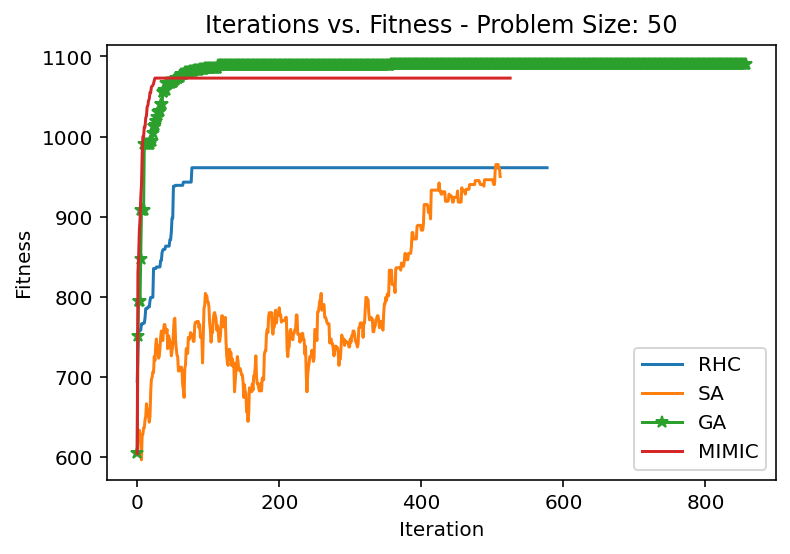

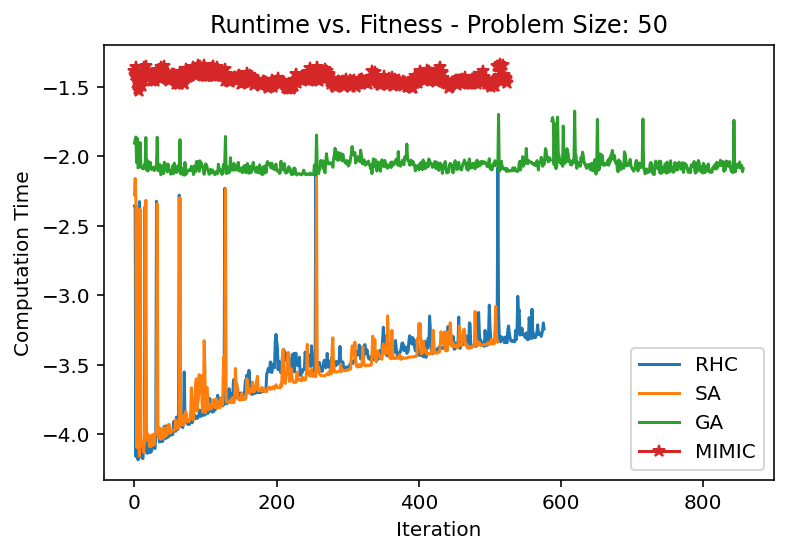

In [34]:
filename1 = '/Users/orentevet/Downloads/randomized_optimization-master/knapsack_baseline_50//**/*__curves_df.csv'
get_plots_1(filename1)
plt.figure()
get_plots_2(filename1)

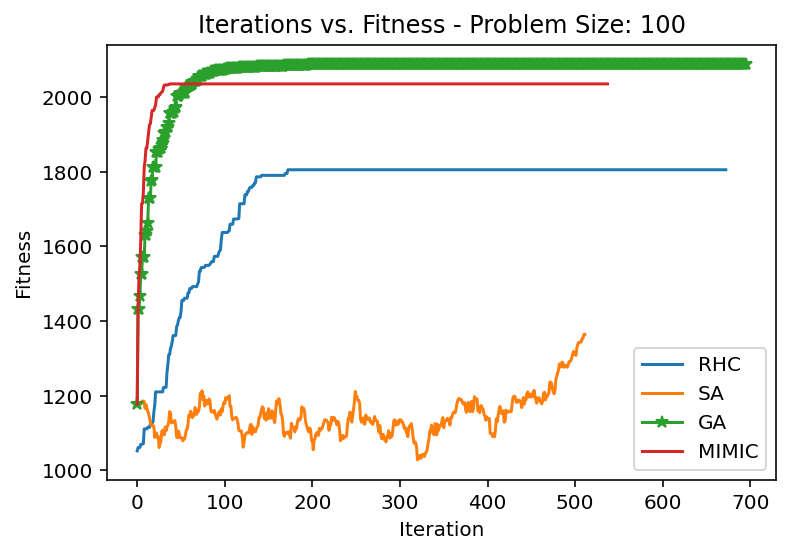

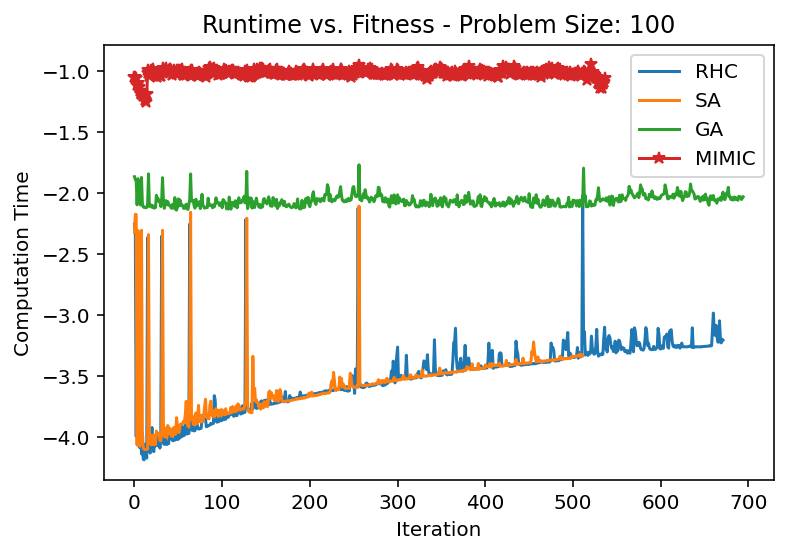

In [35]:
filename1 ='/Users/orentevet/Downloads/randomized_optimization-master/knapsack_baseline_100//**/*__curves_df.csv'
get_plots_1(filename1)
plt.figure()
get_plots_2(filename1)

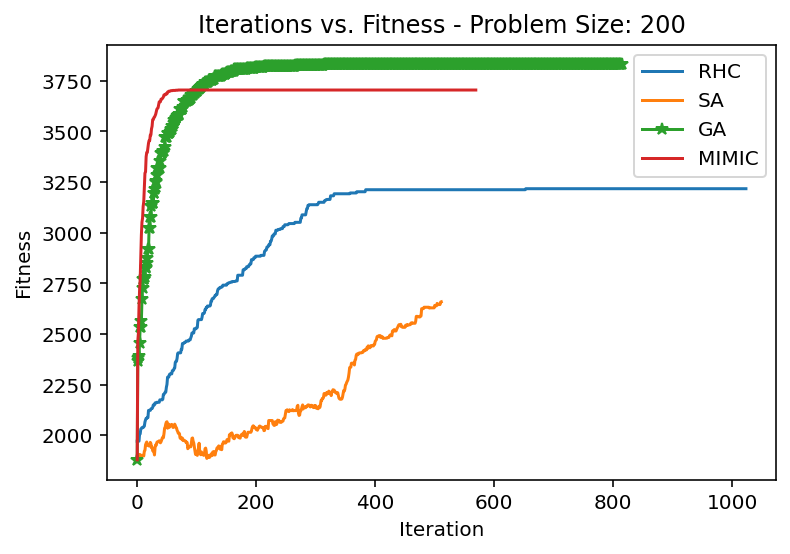

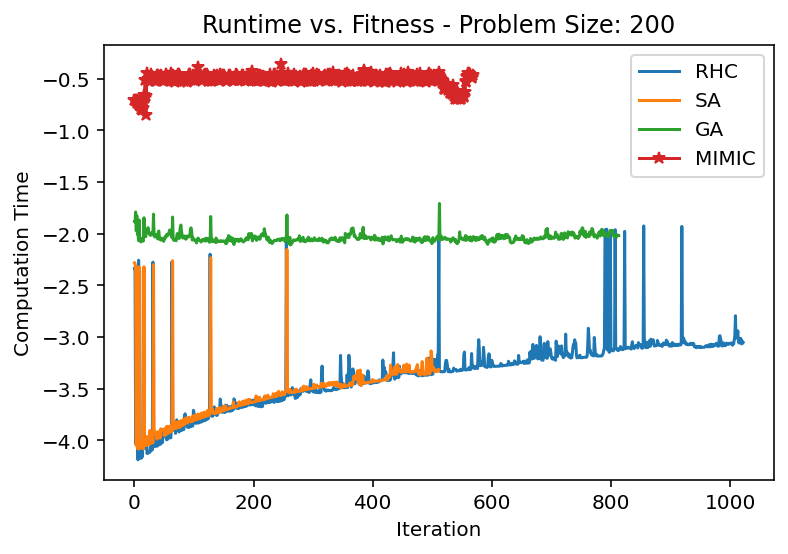

In [52]:
filename1 ='/Users/orentevet/Downloads/randomized_optimization-master/knapsack_baseline_200//**/*__curves_df.csv'
get_plots_1(filename1)
plt.figure()
get_plots_2(filename1)

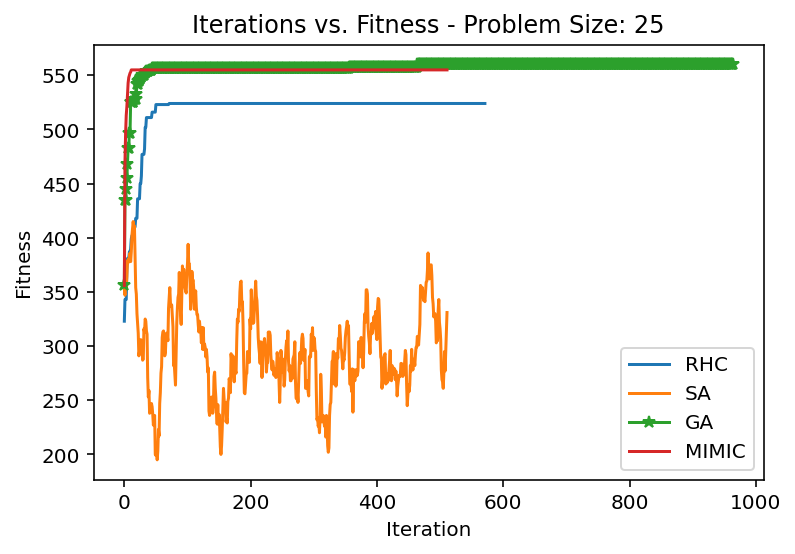

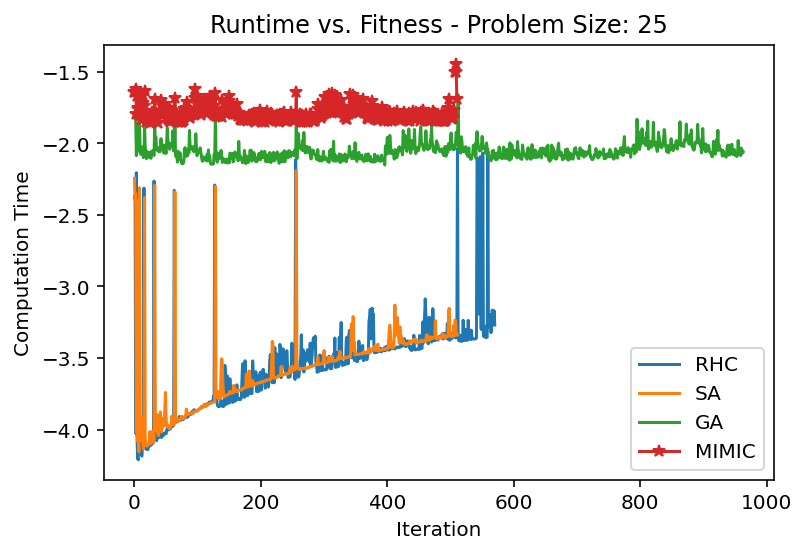

In [53]:
filename1 ='/Users/orentevet/Downloads/randomized_optimization-master/knapsack_baseline_25//**/*__curves_df.csv'
get_plots_1(filename1)
plt.figure()
get_plots_2(filename1)

<Figure size 432x288 with 0 Axes>

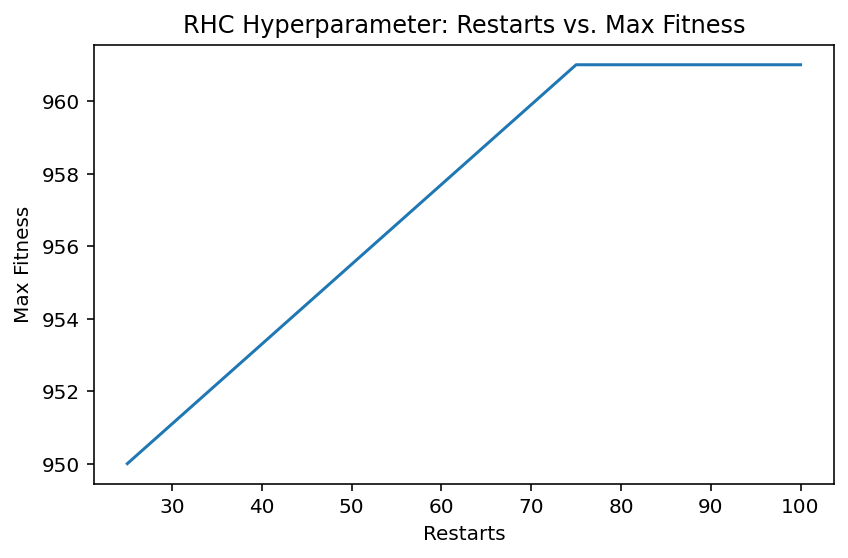

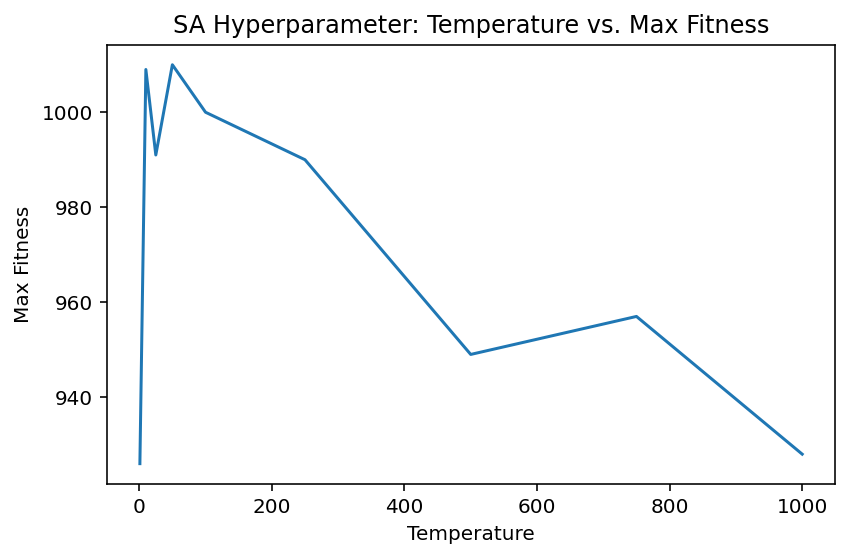

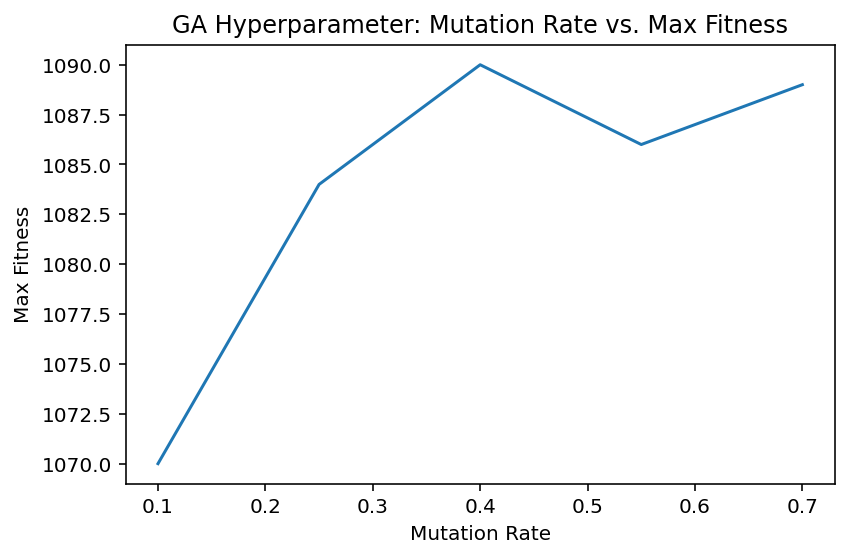

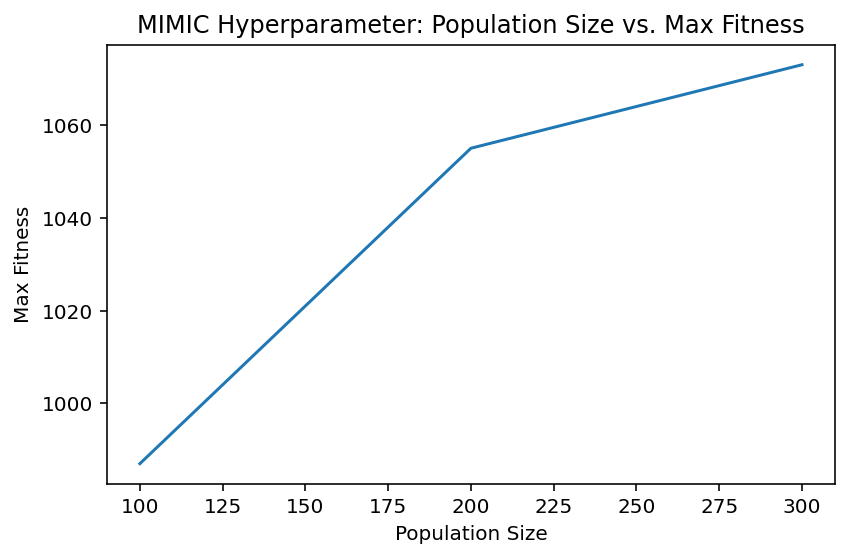

In [30]:
get_plots_3('/Users/orentevet/Downloads/randomized_optimization-master/knapsack_baseline_50//**/*__curves_df.csv')

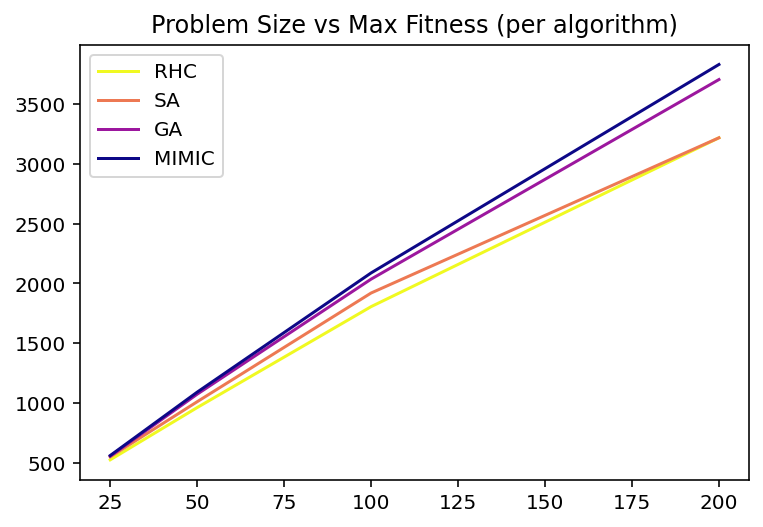

In [51]:
get_plots_4('/Users/orentevet/Downloads/randomized_optimization-master/knapsack_baseline_**//**/*__curves_df.csv')